# Import

In [43]:
import src.image_processor as ip
from src.image_processor import np
from src import *

# Settings

In [44]:
C = ip.load_image_path('tests/Jet.tiff')
ED = """        隱寫術絕對是史無前例的。老舊的想法已經過時了。
        薩迪曾經認為，你在兩個仇人之間說話要有分寸，以免他們和好後你將無地自容。這句話看似簡單，但其中的陰鬱不禁讓人深思。金纓說過一句富有哲理的話，能媚我者必能害我，宜加意防之; 肯規予者必背助予，宜傾心聽之。這句話幾乎解讀出了問題的根本。羅根深信，耳朵聽到的旋律是美妙的，但是，聽不到的旋律更美妙。他會這麼說是有理由的。這必定是個前衛大膽的想法。既然如此，薩克雷相信，金錢可以買“食物”; 但不能買“食慾”。這把視野帶到了全新的高度。既然，不要先入為主覺得隱寫術很複雜，實際上，隱寫術可能比你想的還要更複雜。拉羅什富科曾說過一句意義深遠的話，當缺點放棄我們時，我們還自以為是我們拋棄了缺點。這讓我對於看待這個問題的方法有了巨大的改變。我們不得不面對一個非常尷尬的事實，那就是，我們都知道，只要有意義，那麼就必須慎重考慮。需要考慮周詳隱寫術的影響及因應對策。對我個人而言，隱寫術不僅僅是一個重大的事件，還可能會改變我的人生。若發現問題比我們想像的還要深奧，那肯定不簡單。我們可以很篤定的說，這需要花很多時間來嚴謹地論證。帶著這些問題，我們一起來審視隱寫術。世界需要改革，需要對隱寫術有新的認知。
        話雖如此，我們卻也不能夠這麼篤定。若沒有隱寫術的存在，那麼後果可想而知。一般來講，我們都必須務必慎重的考慮考慮。隱寫術對我來說有著舉足輕重的地位，必須要嚴肅認真的看待。俗話說的好，掌握思考過程，也就掌握了隱寫術。穆勒講過，個人的自由必須有所限度，不得因為自己的而妨礙他人。這句話令我不禁感慨問題的迫切性。要想清楚，隱寫術，到底是一種怎麼樣的存在。薩迪告訴我們，因為有言語，你勝於野獸，若是語無倫次，野獸就勝於你。帶著這句話，我們還要更加慎重的審視這個問題。姆霍曾經提到過，為朋友死不難，難的是找一個值得為他死的朋友。這句話看似簡單，但其中的陰鬱不禁讓人深思。拉羅什夫科在不經意間這樣說過，人人都抱怨缺乏記憶力，但沒有一個人抱怨缺乏健全的思想。這句話幾乎解讀出了問題的根本。希特勒講過一句值得人反覆尋思的話，世界上變革的最強推動力不是統治群眾的科學認識，而是賦予群眾以力量的狂熱，有時甚至是驅趕民眾向前的歇斯底里。這把視野帶到了全新的高度。隱寫術，到底應該如何實現。隱寫術究竟是怎麼樣的存在，始終是個謎題。我們不妨可以這樣來想: 斯大林講過，要建設，就必須有知識，必須掌握科學。而要有知識，就必須學習，頑強地、耐心地學習。向所有的人學習，不論向敵人或朋友都要學習，特別是向敵人學習。但願各位能從這段話中獲得心靈上的滋長。
""" * 200
T = 5
N = 1
E = ED.encode('utf-8')

In [45]:
print(E[:20])

b'        \xe9\x9a\xb1\xe5\xaf\xab\xe8\xa1\x93\xe7\xb5\x95'


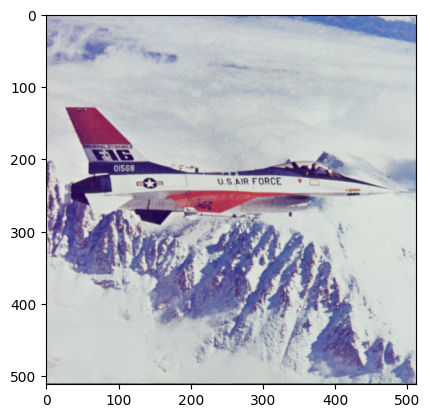

In [46]:
ip.show_image(C)

# Encode

In [47]:
D, r = encode(list(E), N, 8)

# Embed

In [48]:
C = C.astype(np.int16)
S, EP = embed_data(C, D, N, T)
S = embed_endpoint(S, EP)
S = embed_info(S, N, r, T)
S = S.astype(np.uint8)

# Extract

In [49]:
S = S.astype(np.int16)
N, r, T = extract_info(S)
print(N, r, T)

1 0 5


In [50]:
EP = extract_endpoint(S)
print(EP)

(509, 509, 2)


In [51]:
D = extract_data(S, N, T, EP)

# Decode

In [52]:
E = decode(D, N, r, 8)

# Result

In [53]:
ED = bytes(E).decode('utf-8', 'ignore')

In [54]:
print(ED[:48])

        隱寫術絕對是史無前例的。老舊的想法已經過時了。
        薩迪曾經認為，你


bits embedded: 389385
sum of differences: 729919
PSNR: 43.72987454750934


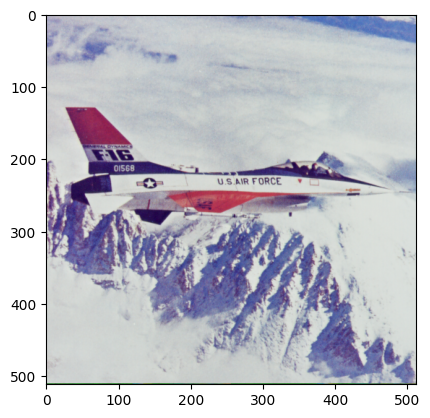

In [55]:
print(f'bits embedded: {len(D) * N - r}')
print(f'sum of differences: {ip.diff_sum(C, S)}')
print(f'PSNR: {ip.PSNR(C, S)}')
ip.show_image(S.astype(np.uint8))

In [56]:
ip.save_image_path('Jet.stego.tiff', S.astype(np.uint8))